In [6]:
import sys
sys.path.append("..")

from utils.model3 import Net_mask
#from utils.model4 import Net_mask
import torch

import matplotlib.pyplot as plt

In [7]:
model_file_ML_inf = "../saved_models/model_infinite/2/model_weights.pth"
model_file_MAP_e4 = "../saved_models/finite_long_e4/map/0/model_weights.pth"
model_file_MAP_e5 = "../saved_models/finite_long_e5/map/0/model_weights.pth"
model_file_MAP_e6 = "../saved_models/finite_long_e6/map/0/model_weights.pth"
model_file_ML_inf_reg = "../saved_models/model_infinite/3_regularization/model_weights.pth"
#model_file = "../saved_models/finite_long_e5/map/0/model_weights.pth"
#model_file = "../saved_models/infinite_test/model_weights.pth"
model_ML_inf = Net_mask()
model_MAP_e4 = Net_mask()
model_MAP_e5 = Net_mask()
model_MAP_e6 = Net_mask()
model_ML_inf_reg = Net_mask()
model_ML_inf.load_state_dict(torch.load(model_file_ML_inf))
model_MAP_e4.load_state_dict(torch.load(model_file_MAP_e4))
model_MAP_e5.load_state_dict(torch.load(model_file_MAP_e5))
model_MAP_e6.load_state_dict(torch.load(model_file_MAP_e6))
model_ML_inf_reg.load_state_dict(torch.load(model_file_ML_inf_reg))

<All keys matched successfully>

In [8]:
test_obses = torch.load('../data/test_observations/all_test_observations.pt')
test_solution = torch.load('../data/test_observations/all_test_solutions.pt')

In [4]:
#num_points = 3
#for j in range(6):
#    ind = int(f'{num_points}{j}')
#    y = test_obses[ind,:10]
#    mask = test_obses[ind,10:]
#    mask_bool = mask > 0.5
#    points = torch.where(mask_bool)[0]
#    values = y[mask_bool]
#
#    test_obs = test_obses[ind]
#    out = model(test_obs)
#
#    plt.figure()
#    plt.plot(range(10), test_solution[ind])
#    plt.plot(range(10), out.detach().numpy())
#    plt.plot(points, values, 'bo')
#    plt.axis([-0.5, 9.5, -2.5, 2.5])

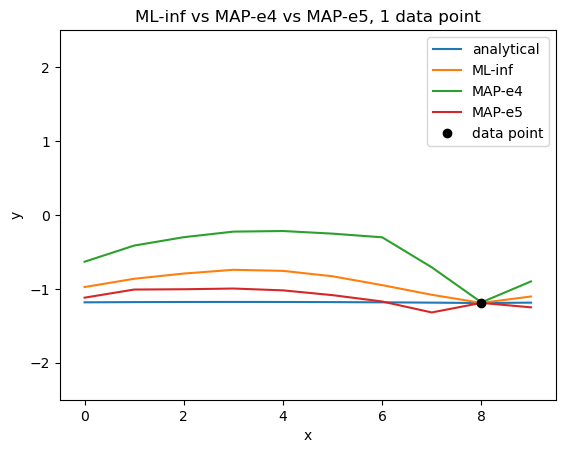

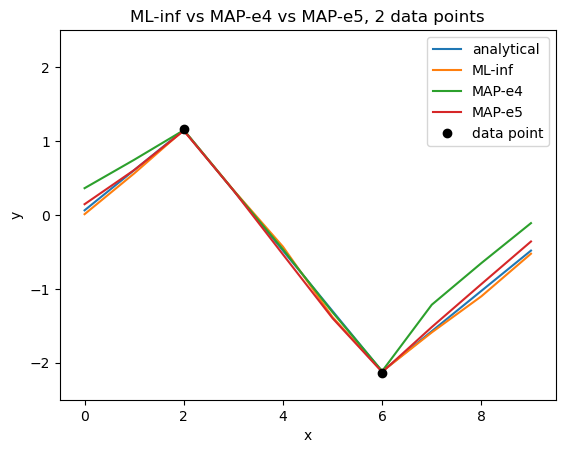

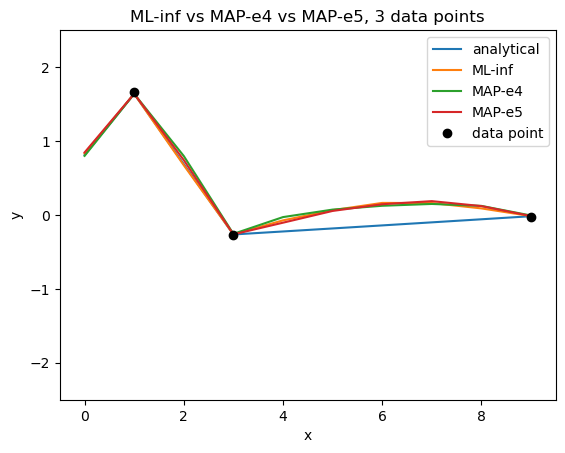

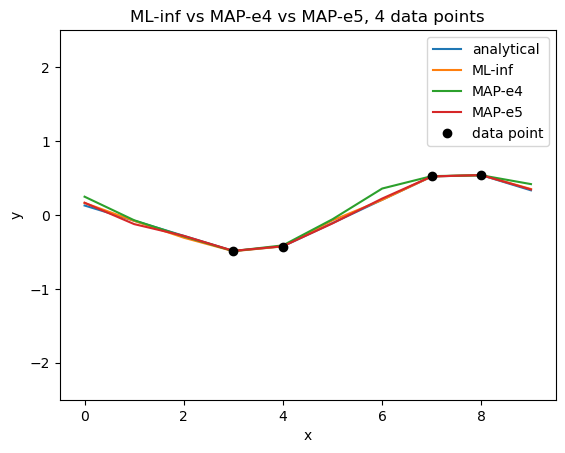

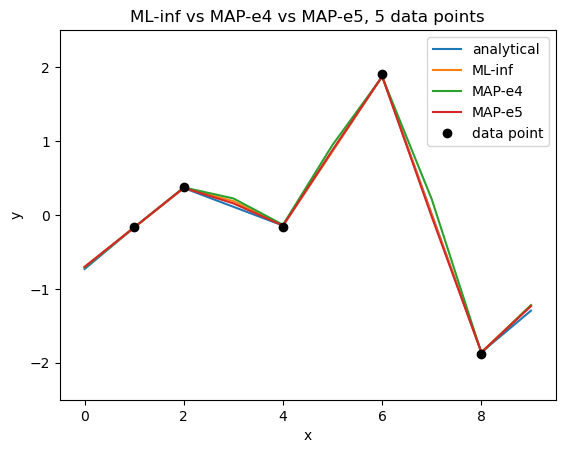

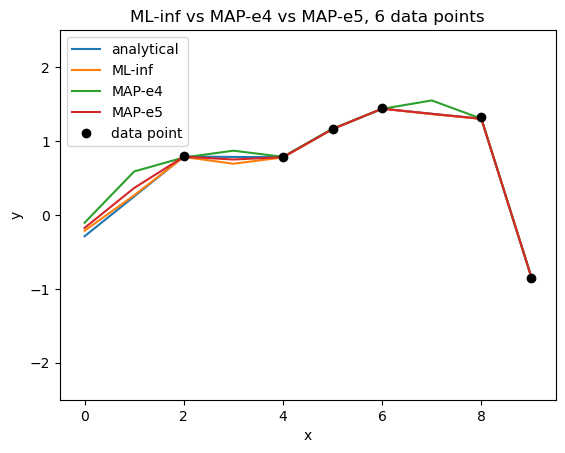

In [18]:
#num_points = 4
j = 0
for num_points in range(1, 7):
#for j in range(6):
    ind = int(f'{num_points}{j}')
    y = test_obses[ind,:10]
    mask = test_obses[ind,10:]
    mask_bool = mask > 0.5
    points = torch.where(mask_bool)[0]
    values = y[mask_bool]

    test_obs = test_obses[ind]
    out_ML_inf = model_ML_inf(test_obs)
    out_MAP_e4 = model_MAP_e4(test_obs)
    out_MAP_e5 = model_MAP_e5(test_obs)
    out_MAP_e6 = model_MAP_e6(test_obs)
    out_ML_inf_reg = model_ML_inf_reg(test_obs)

    plt.figure()
    plt.title(f'ML-inf vs MAP-e4 vs MAP-e5, {num_points} data points')
    if num_points == 1:
        plt.title(f'ML-inf vs MAP-e4 vs MAP-e5, {num_points} data point')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(range(10), test_solution[ind])
    plt.plot(range(10), out_ML_inf.detach().numpy())
    plt.plot(range(10), out_MAP_e4.detach().numpy())
    plt.plot(range(10), out_MAP_e5.detach().numpy())
    #plt.plot(range(10), out_MAP_e6.detach().numpy())
    #plt.plot(range(10), out_ML_inf_reg.detach().numpy())
    plt.plot(points, values, 'ko')
    plt.legend(['analytical', 'ML-inf', 'MAP-e4', 'MAP-e5', 'data point'])
    #plt.legend(['analytical', 'ML-inf', 'ML-inf-reg'])
    #plt.legend(['analytical', 'MAP-e4', 'MAP-e5', 'MAP-e6'])
    plt.axis([-0.5, 9.5, -2.5, 2.5])
    plt.savefig(f'../figures/plot_ML_MAP_vs_analytical/plot_ML_MAP_vs_analytical_{num_points}.png')